In [2]:

%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import pytorch_experiment
plt.rcParams['image.cmap'] = 'gray'


In [3]:
from torchsummary import summary
import torch
use_cuda=torch.cuda.is_available()


import os
import datasets
import pytorch_models
import torch.optim as optim
dataset="cifar10"
(x_train, y_train), (x_test, y_test), input_shape,num_classes = datasets.get_data(dataset)


print('x_train shape:', x_train.shape,x_train.dtype)
print('x_test shape:', x_test.shape,x_test.dtype)
print('y_train shape:', y_train.shape,y_train.dtype)
print('y_test shape:', y_test.shape,y_test.dtype)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


import numpy as np
print(np.unique(y_train.argmax(axis=1)))
print(y_train.min(),y_train.max())


Using TensorFlow backend.
/home/facundo/.python/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


x_train shape: (50000, 32, 32, 3) uint8
x_test shape: (10000, 32, 32, 3) uint8
y_train shape: (50000, 10) float64
y_test shape: (10000, 10) float64
50000 train samples
10000 test samples
[0 1 2 3 4 5 6 7 8 9]
0.0 1.0


In [4]:
conv_filters={"mnist":32,"mnist_rot":32,"cifar10":64}
fc_filters={"mnist":64,"mnist_rot":64,"cifar10":128}

model = pytorch_models.SimpleConv(input_shape,num_classes,
                                 conv_filters=conv_filters[dataset],fc_filters=fc_filters[dataset])
#model= pytorch_models.FFNet(input_shape,num_classes)x
if use_cuda:
    model=model.cuda()
    
parameters=pytorch_experiment.add_weight_decay(model.named_parameters(),1e-9)
optimizer = optim.Adam(parameters, lr=0.001)

print(model)
#summary(model, input_size=[1,28,28])


SimpleConv(
  (conv): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
  )
  (fc): Sequential(
    (0): Linear(in_features=16384, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [5]:

rotated_model= pytorch_models.SimpleConv(input_shape,num_classes,
                                       conv_filters=conv_filters[dataset],fc_filters=fc_filters[dataset])

if use_cuda:
    rotated_model= rotated_model.cuda()

rotated_parameters=pytorch_experiment.add_weight_decay(rotated_model.named_parameters(),1e-9)
rotated_optimizer = optim.Adam(rotated_parameters, lr=0.001)

print(rotated_model)
#summary(model, input_size=[1,28,28])


SimpleConv(
  (conv): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
  )
  (fc): Sequential(
    (0): Linear(in_features=16384, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


Training model with unrotated dataset...


Epoch 1: 100% (batch 782/782)  ==stats==> loss:  0.871, accuracy:  0.691, Time:  0:00:20


Test => Loss: 0.8621, Accuracy: 70.26% (7026/10000)


Epoch 2: 100% (batch 782/782)  ==stats==> loss:  0.649, accuracy:  0.771, Time:  0:00:20


Test => Loss: 0.6751, Accuracy: 77.11% (7711/10000)


Epoch 3: 100% (batch 782/782)  ==stats==> loss:  0.477, accuracy:  0.836, Time:  0:00:27


Test => Loss: 0.5869, Accuracy: 79.75% (7975/10000)


Epoch 4: 100% (batch 782/782)  ==stats==> loss:  0.347, accuracy:  0.877, Time:  0:00:26


Test => Loss: 0.6045, Accuracy: 80.30% (8030/10000)


Epoch 5: 100% (batch 782/782)  ==stats==> loss:  0.225, accuracy:  0.921, Time:  0:00:27


Test => Loss: 0.7079, Accuracy: 80.30% (8030/10000)


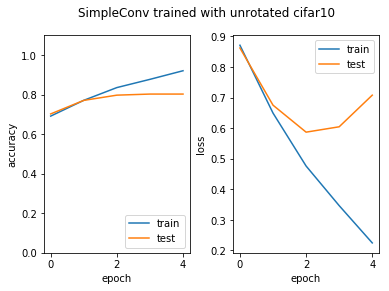

Skipping pretraining rotated model with unrotated dataset
Training rotated model with rotated dataset...


Epoch 1: 100% (batch 782/782)  ==stats==> loss:   1.73, accuracy:  0.368, Time:  0:00:28


Test => Loss: 1.6076, Accuracy: 41.81% (4181/10000)


Epoch 2: 100% (batch 782/782)  ==stats==> loss:   1.54, accuracy:  0.443, Time:  0:00:28


Test => Loss: 1.4780, Accuracy: 46.39% (4639/10000)


Epoch 3: 100% (batch 782/782)  ==stats==> loss:    1.4, accuracy:  0.493, Time:  0:00:27


Test => Loss: 1.3834, Accuracy: 50.23% (5023/10000)


Epoch 4: 100% (batch 782/782)  ==stats==> loss:    1.3, accuracy:   0.53, Time:  0:00:28


Test => Loss: 1.2429, Accuracy: 55.57% (5557/10000)


Epoch 5: 100% (batch 782/782)  ==stats==> loss:   1.21, accuracy:  0.567, Time:  0:00:28


Test => Loss: 1.1973, Accuracy: 57.15% (5715/10000)


Epoch 6: 100% (batch 782/782)  ==stats==> loss:   1.14, accuracy:  0.592, Time:  0:00:28


Test => Loss: 1.1299, Accuracy: 59.54% (5954/10000)


Epoch 7: 100% (batch 782/782)  ==stats==> loss:   1.09, accuracy:  0.612, Time:  0:00:27


Test => Loss: 1.0997, Accuracy: 60.80% (6080/10000)


Epoch 8: 100% (batch 782/782)  ==stats==> loss:   1.04, accuracy:   0.63, Time:  0:00:28


Test => Loss: 1.0768, Accuracy: 61.94% (6194/10000)


Epoch 9: 100% (batch 782/782)  ==stats==> loss:      1, accuracy:  0.645, Time:  0:00:27


Test => Loss: 1.0126, Accuracy: 64.14% (6414/10000)


Epoch 10: 100% (batch 782/782)  ==stats==> loss:  0.967, accuracy:  0.655, Time:  0:00:28


Test => Loss: 1.0044, Accuracy: 65.29% (6529/10000)


Epoch 11: 100% (batch 782/782)  ==stats==> loss:  0.938, accuracy:  0.667, Time:  0:00:27


Test => Loss: 0.9724, Accuracy: 65.53% (6553/10000)


Epoch 12: 100% (batch 782/782)  ==stats==> loss:  0.912, accuracy:  0.677, Time:  0:00:28


Test => Loss: 0.9768, Accuracy: 65.75% (6575/10000)


Epoch 13: 100% (batch 782/782)  ==stats==> loss:  0.889, accuracy:  0.686, Time:  0:00:28


Test => Loss: 0.9390, Accuracy: 67.19% (6719/10000)


Epoch 14: 100% (batch 782/782)  ==stats==> loss:  0.861, accuracy:  0.696, Time:  0:00:27


Test => Loss: 0.9239, Accuracy: 67.95% (6795/10000)


Epoch 15: 100% (batch 782/782)  ==stats==> loss:  0.844, accuracy:  0.702, Time:  0:00:28


Test => Loss: 0.9104, Accuracy: 68.26% (6826/10000)


Epoch 16: 100% (batch 782/782)  ==stats==> loss:  0.824, accuracy:  0.709, Time:  0:00:29


Test => Loss: 0.8838, Accuracy: 69.07% (6907/10000)


Epoch 17: 100% (batch 782/782)  ==stats==> loss:  0.808, accuracy:  0.716, Time:  0:00:28


Test => Loss: 0.8871, Accuracy: 69.03% (6903/10000)


Epoch 18: 100% (batch 782/782)  ==stats==> loss:  0.792, accuracy:  0.721, Time:  0:00:28


Test => Loss: 0.8616, Accuracy: 69.78% (6978/10000)


Epoch 19: 100% (batch 782/782)  ==stats==> loss:  0.777, accuracy:  0.727, Time:  0:00:28


Test => Loss: 0.8574, Accuracy: 70.27% (7027/10000)


Epoch 20: 100% (batch 782/782)  ==stats==> loss:  0.759, accuracy:  0.733, Time:  0:00:28


Test => Loss: 0.8955, Accuracy: 68.88% (6888/10000)


Epoch 21: 100% (batch 782/782)  ==stats==> loss:  0.748, accuracy:  0.736, Time:  0:00:28


Test => Loss: 0.8749, Accuracy: 69.97% (6997/10000)


Epoch 22: 100% (batch 782/782)  ==stats==> loss:  0.737, accuracy:  0.742, Time:  0:00:27


Test => Loss: 0.8678, Accuracy: 70.00% (7000/10000)


Epoch 23: 100% (batch 782/782)  ==stats==> loss:   0.72, accuracy:  0.745, Time:  0:00:27


Test => Loss: 0.8674, Accuracy: 70.04% (7004/10000)


Epoch 24: 100% (batch 782/782)  ==stats==> loss:  0.711, accuracy:  0.748, Time:  0:00:28


Test => Loss: 0.8518, Accuracy: 69.85% (6985/10000)


Epoch 25: 100% (batch 782/782)  ==stats==> loss:  0.705, accuracy:  0.752, Time:  0:00:27


Test => Loss: 0.8556, Accuracy: 70.56% (7056/10000)


Epoch 26: 100% (batch 782/782)  ==stats==> loss:  0.691, accuracy:  0.756, Time:  0:00:28


Test => Loss: 0.9441, Accuracy: 69.03% (6903/10000)


Epoch 27: 100% (batch 782/782)  ==stats==> loss:  0.685, accuracy:  0.758, Time:  0:00:27


Test => Loss: 0.8479, Accuracy: 71.65% (7165/10000)


Epoch 28: 100% (batch 782/782)  ==stats==> loss:  0.671, accuracy:  0.764, Time:  0:00:28


Test => Loss: 0.8357, Accuracy: 71.75% (7175/10000)


Epoch 29: 100% (batch 782/782)  ==stats==> loss:  0.662, accuracy:  0.765, Time:  0:00:27


Test => Loss: 0.8282, Accuracy: 71.47% (7147/10000)


Epoch 30: 100% (batch 782/782)  ==stats==> loss:  0.657, accuracy:  0.769, Time:  0:00:27


Test => Loss: 0.8277, Accuracy: 72.12% (7212/10000)


Epoch 31: 100% (batch 782/782)  ==stats==> loss:  0.645, accuracy:  0.773, Time:  0:00:28


Test => Loss: 0.8332, Accuracy: 71.82% (7182/10000)


Epoch 32: 100% (batch 782/782)  ==stats==> loss:  0.634, accuracy:  0.778, Time:  0:00:27


Test => Loss: 0.8499, Accuracy: 71.58% (7158/10000)


Epoch 33: 100% (batch 782/782)  ==stats==> loss:   0.63, accuracy:  0.779, Time:  0:00:27


Test => Loss: 0.8324, Accuracy: 71.64% (7164/10000)


Epoch 34: 100% (batch 782/782)  ==stats==> loss:  0.618, accuracy:  0.783, Time:  0:00:28


Test => Loss: 0.8547, Accuracy: 71.97% (7197/10000)


Epoch 35: 100% (batch 782/782)  ==stats==> loss:  0.616, accuracy:  0.783, Time:  0:00:27


Test => Loss: 0.8313, Accuracy: 72.22% (7222/10000)


Epoch 36: 100% (batch 782/782)  ==stats==> loss:  0.609, accuracy:  0.786, Time:  0:00:28


Test => Loss: 0.8348, Accuracy: 71.38% (7138/10000)


Epoch 37: 100% (batch 782/782)  ==stats==> loss:  0.602, accuracy:   0.79, Time:  0:00:28


Test => Loss: 0.8368, Accuracy: 72.00% (7200/10000)


Epoch 38: 100% (batch 782/782)  ==stats==> loss:  0.592, accuracy:  0.793, Time:  0:00:28


Test => Loss: 0.8709, Accuracy: 71.37% (7137/10000)


Epoch 39: 100% (batch 782/782)  ==stats==> loss:  0.587, accuracy:  0.795, Time:  0:00:28


Test => Loss: 0.8223, Accuracy: 72.44% (7244/10000)


Epoch 40: 100% (batch 782/782)  ==stats==> loss:  0.581, accuracy:  0.795, Time:  0:00:28


Test => Loss: 0.8121, Accuracy: 73.26% (7326/10000)


Epoch 41: 100% (batch 782/782)  ==stats==> loss:  0.574, accuracy:  0.797, Time:  0:00:28


Test => Loss: 0.8343, Accuracy: 72.11% (7211/10000)


Epoch 42: 100% (batch 782/782)  ==stats==> loss:   0.57, accuracy:  0.799, Time:  0:00:29


Test => Loss: 0.7966, Accuracy: 73.07% (7307/10000)


Epoch 43: 100% (batch 782/782)  ==stats==> loss:  0.554, accuracy:  0.804, Time:  0:00:27


Test => Loss: 0.8433, Accuracy: 71.85% (7185/10000)


Epoch 44: 100% (batch 782/782)  ==stats==> loss:  0.562, accuracy:  0.802, Time:  0:00:28


Test => Loss: 0.8129, Accuracy: 72.83% (7283/10000)


Epoch 45: 100% (batch 782/782)  ==stats==> loss:  0.549, accuracy:  0.808, Time:  0:00:27


Test => Loss: 0.8480, Accuracy: 72.76% (7276/10000)


Epoch 46: 100% (batch 782/782)  ==stats==> loss:  0.542, accuracy:   0.81, Time:  0:00:27


Test => Loss: 0.8401, Accuracy: 72.01% (7201/10000)


Epoch 47: 100% (batch 782/782)  ==stats==> loss:  0.542, accuracy:  0.808, Time:  0:00:28


Test => Loss: 0.8489, Accuracy: 72.55% (7255/10000)


Epoch 48: 100% (batch 782/782)  ==stats==> loss:  0.537, accuracy:  0.811, Time:  0:00:28


Test => Loss: 0.8216, Accuracy: 73.04% (7304/10000)


Epoch 49: 100% (batch 782/782)  ==stats==> loss:  0.526, accuracy:  0.815, Time:  0:00:28


Test => Loss: 0.8182, Accuracy: 73.20% (7320/10000)


Epoch 50: 100% (batch 782/782)  ==stats==> loss:  0.526, accuracy:  0.815, Time:  0:00:28


Test => Loss: 0.8419, Accuracy: 72.80% (7280/10000)


Epoch 51: 100% (batch 782/782)  ==stats==> loss:  0.516, accuracy:  0.817, Time:  0:00:27


Test => Loss: 0.8293, Accuracy: 72.94% (7294/10000)


Epoch 52: 100% (batch 782/782)  ==stats==> loss:  0.515, accuracy:  0.819, Time:  0:00:28


Test => Loss: 0.8458, Accuracy: 72.68% (7268/10000)


Epoch 53: 100% (batch 782/782)  ==stats==> loss:  0.511, accuracy:  0.819, Time:  0:00:27


Test => Loss: 0.8414, Accuracy: 73.77% (7377/10000)


Epoch 54: 100% (batch 782/782)  ==stats==> loss:  0.504, accuracy:  0.822, Time:  0:00:27


Test => Loss: 0.8459, Accuracy: 73.00% (7300/10000)


Epoch 55: 100% (batch 782/782)  ==stats==> loss:  0.506, accuracy:  0.823, Time:  0:00:28


Test => Loss: 0.8246, Accuracy: 73.55% (7355/10000)


Epoch 56: 100% (batch 782/782)  ==stats==> loss:  0.497, accuracy:  0.826, Time:  0:00:27


Test => Loss: 0.8234, Accuracy: 73.19% (7319/10000)


Epoch 57: 100% (batch 782/782)  ==stats==> loss:  0.492, accuracy:  0.826, Time:  0:00:28


Test => Loss: 0.8345, Accuracy: 73.06% (7306/10000)


Epoch 58: 100% (batch 782/782)  ==stats==> loss:   0.49, accuracy:  0.829, Time:  0:00:28


Test => Loss: 0.8311, Accuracy: 73.84% (7384/10000)


Epoch 59: 100% (batch 782/782)  ==stats==> loss:  0.487, accuracy:  0.828, Time:  0:00:27


Test => Loss: 0.8057, Accuracy: 73.78% (7378/10000)


Epoch 60: 100% (batch 782/782)  ==stats==> loss:  0.483, accuracy:   0.83, Time:  0:00:28


Test => Loss: 0.8135, Accuracy: 73.39% (7339/10000)


Epoch 61: 100% (batch 782/782)  ==stats==> loss:  0.473, accuracy:  0.834, Time:  0:00:27


Test => Loss: 0.8232, Accuracy: 74.37% (7437/10000)


Epoch 62: 100% (batch 782/782)  ==stats==> loss:  0.474, accuracy:  0.833, Time:  0:00:27


Test => Loss: 0.8431, Accuracy: 73.87% (7387/10000)


Epoch 63: 100% (batch 782/782)  ==stats==> loss:  0.471, accuracy:  0.833, Time:  0:00:28


Test => Loss: 0.8200, Accuracy: 73.99% (7399/10000)


Epoch 64: 100% (batch 782/782)  ==stats==> loss:  0.464, accuracy:  0.837, Time:  0:00:28


Test => Loss: 0.8119, Accuracy: 74.41% (7441/10000)


Epoch 65: 100% (batch 782/782)  ==stats==> loss:   0.46, accuracy:  0.837, Time:  0:00:28


Test => Loss: 0.8428, Accuracy: 73.15% (7315/10000)


Epoch 66: 100% (batch 782/782)  ==stats==> loss:  0.454, accuracy:  0.839, Time:  0:00:28


Test => Loss: 0.8487, Accuracy: 72.71% (7271/10000)


Epoch 67: 100% (batch 782/782)  ==stats==> loss:  0.458, accuracy:  0.839, Time:  0:00:28


Test => Loss: 0.8270, Accuracy: 73.60% (7360/10000)


Epoch 68: 100% (batch 782/782)  ==stats==> loss:  0.444, accuracy:  0.842, Time:  0:00:28


Test => Loss: 0.8437, Accuracy: 73.86% (7386/10000)


Epoch 69: 100% (batch 782/782)  ==stats==> loss:  0.441, accuracy:  0.845, Time:  0:00:28


Test => Loss: 0.8399, Accuracy: 73.89% (7389/10000)


Epoch 70: 100% (batch 782/782)  ==stats==> loss:  0.444, accuracy:  0.843, Time:  0:00:27


Test => Loss: 0.8298, Accuracy: 74.22% (7422/10000)


Epoch 71: 100% (batch 782/782)  ==stats==> loss:  0.434, accuracy:  0.847, Time:  0:00:28


Test => Loss: 0.8713, Accuracy: 73.49% (7349/10000)


Epoch 72: 100% (batch 782/782)  ==stats==> loss:  0.437, accuracy:  0.846, Time:  0:00:27


Test => Loss: 0.8688, Accuracy: 73.11% (7311/10000)


Epoch 73: 100% (batch 782/782)  ==stats==> loss:  0.433, accuracy:  0.846, Time:  0:00:27


Test => Loss: 0.8431, Accuracy: 74.27% (7427/10000)


Epoch 74: 100% (batch 782/782)  ==stats==> loss:  0.429, accuracy:   0.85, Time:  0:00:27


Test => Loss: 0.8744, Accuracy: 73.76% (7376/10000)


Epoch 75: 100% (batch 782/782)  ==stats==> loss:  0.423, accuracy:  0.851, Time:  0:00:27


Test => Loss: 0.8532, Accuracy: 74.14% (7414/10000)


Epoch 76: 100% (batch 782/782)  ==stats==> loss:  0.417, accuracy:  0.852, Time:  0:00:28


Test => Loss: 0.8722, Accuracy: 73.73% (7373/10000)


Epoch 77: 100% (batch 782/782)  ==stats==> loss:  0.416, accuracy:  0.853, Time:  0:00:29


Test => Loss: 0.8364, Accuracy: 73.68% (7368/10000)


Epoch 78: 100% (batch 782/782)  ==stats==> loss:  0.415, accuracy:  0.854, Time:  0:00:27


Test => Loss: 0.8816, Accuracy: 74.23% (7423/10000)


Epoch 79: 100% (batch 782/782)  ==stats==> loss:  0.411, accuracy:  0.855, Time:  0:00:28


Test => Loss: 0.8680, Accuracy: 74.07% (7407/10000)


Epoch 80: 100% (batch 782/782)  ==stats==> loss:  0.406, accuracy:  0.858, Time:  0:00:27


Test => Loss: 0.8814, Accuracy: 73.62% (7362/10000)


Epoch 81: 100% (batch 782/782)  ==stats==> loss:  0.407, accuracy:  0.856, Time:  0:00:28


Test => Loss: 0.8594, Accuracy: 73.74% (7374/10000)


Epoch 82: 100% (batch 782/782)  ==stats==> loss:  0.407, accuracy:  0.856, Time:  0:00:28


Test => Loss: 0.8909, Accuracy: 73.73% (7373/10000)


Epoch 83: 100% (batch 782/782)  ==stats==> loss:  0.398, accuracy:  0.859, Time:  0:00:28


Test => Loss: 0.8912, Accuracy: 73.80% (7380/10000)


Epoch 84: 100% (batch 782/782)  ==stats==> loss:  0.397, accuracy:  0.859, Time:  0:00:30


Test => Loss: 0.8893, Accuracy: 74.06% (7406/10000)


Epoch 85: 100% (batch 782/782)  ==stats==> loss:  0.394, accuracy:  0.861, Time:  0:00:30


Test => Loss: 0.8658, Accuracy: 74.13% (7413/10000)


Epoch 86: 100% (batch 782/782)  ==stats==> loss:  0.392, accuracy:  0.862, Time:  0:00:27


Test => Loss: 0.8743, Accuracy: 74.02% (7402/10000)


Epoch 87: 100% (batch 782/782)  ==stats==> loss:  0.388, accuracy:  0.862, Time:  0:00:28


Test => Loss: 0.8526, Accuracy: 74.11% (7411/10000)


Epoch 88: 100% (batch 782/782)  ==stats==> loss:  0.384, accuracy:  0.864, Time:  0:00:27


Test => Loss: 0.8538, Accuracy: 74.26% (7426/10000)


Epoch 89: 100% (batch 782/782)  ==stats==> loss:  0.383, accuracy:  0.865, Time:  0:00:28


Test => Loss: 0.8693, Accuracy: 74.16% (7416/10000)


Epoch 90: 100% (batch 782/782)  ==stats==> loss:  0.374, accuracy:  0.868, Time:  0:00:27


Test => Loss: 0.8851, Accuracy: 74.03% (7403/10000)


Epoch 91: 100% (batch 782/782)  ==stats==> loss:  0.375, accuracy:  0.868, Time:  0:00:27


Test => Loss: 0.8799, Accuracy: 74.15% (7415/10000)


Epoch 92: 100% (batch 782/782)  ==stats==> loss:  0.373, accuracy:  0.868, Time:  0:00:28


Test => Loss: 0.8687, Accuracy: 74.36% (7436/10000)


Epoch 93: 100% (batch 782/782)  ==stats==> loss:   0.37, accuracy:   0.87, Time:  0:00:27


Test => Loss: 0.8791, Accuracy: 73.79% (7379/10000)


Epoch 94: 100% (batch 782/782)  ==stats==> loss:  0.375, accuracy:  0.867, Time:  0:00:27


Test => Loss: 0.8810, Accuracy: 74.00% (7400/10000)


Epoch 95: 100% (batch 782/782)  ==stats==> loss:  0.368, accuracy:  0.869, Time:  0:00:28


Test => Loss: 0.8932, Accuracy: 74.23% (7423/10000)


Epoch 96: 100% (batch 782/782)  ==stats==> loss:  0.359, accuracy:  0.873, Time:  0:00:27


Test => Loss: 0.8788, Accuracy: 74.50% (7450/10000)


Epoch 97: 100% (batch 782/782)  ==stats==> loss:  0.362, accuracy:  0.871, Time:  0:00:27


Test => Loss: 0.8726, Accuracy: 74.42% (7442/10000)


Epoch 98: 100% (batch 782/782)  ==stats==> loss:  0.359, accuracy:  0.874, Time:  0:00:27


Test => Loss: 0.8970, Accuracy: 74.69% (7469/10000)


Epoch 99: 100% (batch 782/782)  ==stats==> loss:  0.361, accuracy:  0.872, Time:  0:00:32


Test => Loss: 0.8743, Accuracy: 73.89% (7389/10000)


Epoch 100: 100% (batch 782/782)  ==stats==> loss:  0.356, accuracy:  0.874, Time:  0:00:32


Test => Loss: 0.8946, Accuracy: 73.38% (7338/10000)


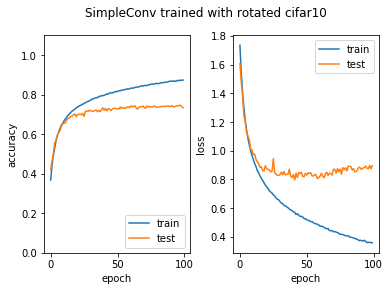

Testing both models on both datasets...


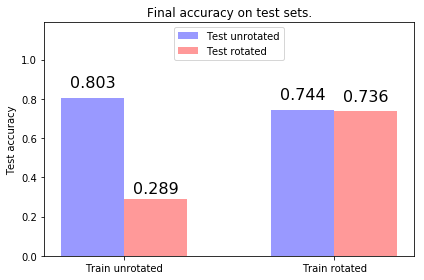

model_rotated_test_dataset score: loss=4.057992, accuracy=0.288600
model_rotated_train_dataset score: loss=4.085702, accuracy=0.290440
model_test_dataset score: loss=0.707865, accuracy=0.803000
model_train_dataset score: loss=0.144176, accuracy=0.952400
rotated_model_rotated_test_dataset score: loss=0.886729, accuracy=0.736200
rotated_model_rotated_train_dataset score: loss=0.348397, accuracy=0.877060
rotated_model_test_dataset score: loss=0.903275, accuracy=0.743900
rotated_model_train_dataset score: loss=0.310587, accuracy=0.891060


In [7]:

batch_size = 64

epochs={'cifar10':5,'mnist':5,'fashion_mnist':12,'cluttered_mnist':10,'lsa16':15,'mnist_rot':5,'pugeault':15}

rotated_epochs={'cifar10':100,'mnist':15,'fashion_mnist':60,'cluttered_mnist':30,'lsa16':100,'mnist_rot':5,'pugeault':40}

config=pytorch_experiment.TrainRotatedConfig(dataset_name=dataset,batch_size=batch_size,
                   epochs=epochs[dataset],rotated_epochs=rotated_epochs[dataset],
                   pre_rotated_epochs=0, optimizer=optimizer,rotated_optimizer=rotated_optimizer,
                  use_cuda=use_cuda)

scores=pytorch_experiment.train_rotated(config,model,rotated_model,
                                        x_train,y_train,x_test,y_test,plot_accuracy=True)
for k,v in scores.items():
    print('%s score: loss=%f, accuracy=%f' % (k,v[0],v[1]))


    
    


In [6]:
from datetime import datetime

output_file="results/simple_conv.txt"
general_message="%s\nResults on dataset %s with model %s and rotated model %s\n" % (str(datetime.now()),dataset,model.name,rotated_model.name)
pytorch_experiment.write_scores(scores,output_file,general_message,config)


2018-09-10 04:06:02.619036
Results on dataset mnist with model SimpleConv and rotated model SimpleConv

model_rotated_test_dataset score: loss=4.401523, accuracy=0.435500

model_rotated_train_dataset score: loss=4.362092, accuracy=0.439900

model_test_dataset score: loss=0.024421, accuracy=0.992300

model_train_dataset score: loss=0.009378, accuracy=0.996917

rotated_model_rotated_test_dataset score: loss=0.062537, accuracy=0.979300

rotated_model_rotated_train_dataset score: loss=0.057263, accuracy=0.982333

rotated_model_test_dataset score: loss=0.059741, accuracy=0.981100

rotated_model_train_dataset score: loss=0.053442, accuracy=0.983417

Config: TrainRotatedConfig(dataset_name='mnist', batch_size=64, epochs=5, pre_rotated_epochs=0, rotated_epochs=15, optimizer=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0.0

Parameter Group 1
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_de